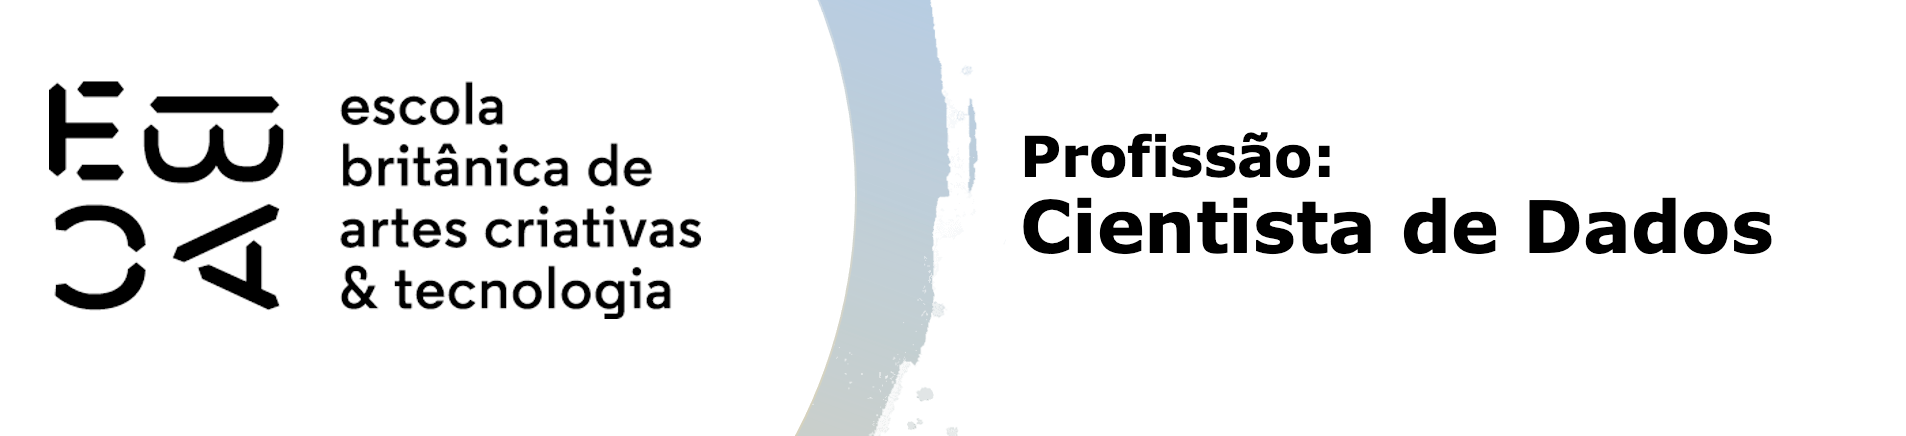

# Projeto de Parceria | Semantix

# Analysis of Global Black Money Transactions Dataset

## Introduction
This notebook presents a detailed analysis of the Global Black Money Transactions Dataset. The dataset contains information on financial transactions involving black money, encompassing various countries, industries, and transaction types. The objective of this analysis is to identify patterns, trends, and anomalies through a series of visualizations and statistical methods. The dataset can be accessed from [Kaggle](https://www.kaggle.com/datasets/waqi786/global-black-money-transactions-dataset).


## Dataset Overview
The dataset includes the following columns:

- **Transaction ID**: Unique identifier for each transaction.
- **Country**: Origin country of the transaction.
- **Amount (USD)**: Amount of money involved in the transaction.
- **Transaction Type**: Type of the transaction (e.g., Offshore Transfer, Cash Withdrawal).
- **Date of Transaction**: Date and time when the transaction occurred.
- **Person Involved**: Identifier for the person associated with the transaction.
- **Industry**: Industry related to the transaction.
- **Destination Country**: Country where the funds are directed.
- **Reported by Authority**: Boolean indicating if the transaction was reported by authorities.
- **Source of Money**: Source of the money (e.g., Illegal, Legal).
- **Money Laundering Risk Score**: Risk score associated with money laundering.
- **Shell Companies Involved**: Number of shell companies involved in the transaction.
- **Financial Institution**: Institution managing the transaction.
- **Tax Haven Country**: Country identified as a tax haven.


## Import Libraries.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import numpy as np


df = pd.read_csv('Big_Black_Money_Dataset.csv')
df.shape
df


,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TX0000009996,Singapore,2.209229e+06,Offshore Transfer,2014-02-21 11:00:00,Person_6896,Real Estate,Brazil,False,Illegal,4,4,Bank_258,Luxembourg
9996,TX0000009997,UAE,4.800338e+06,Property Purchase,2014-02-21 12:00:00,Person_6348,Luxury Goods,Russia,False,Legal,10,2,Bank_449,Luxembourg
9997,TX0000009998,UK,4.891953e+05,Stocks Transfer,2014-02-21 13:00:00,Person_4171,Oil & Gas,Russia,False,Illegal,5,0,Bank_156,Cayman Islands
9998,TX0000009999,Brazil,2.233581e+06,Offshore Transfer,2014-02-21 14:00:00,Person_2799,Real Estate,Russia,True,Illegal,10,5,Bank_12,Singapore


## Check Data Types and Missing Values.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

## Summary Statistics



In [10]:
# Get summary statistics for numerical columns
df.describe()

,Amount (USD),Money Laundering Risk Score,Shell Companies Involved
count,1.000000e+04,10000.000000,10000.000000
mean,2.501818e+06,5.526400,4.469400
std,1.424364e+06,2.893603,2.879773
min,1.003180e+04,1.000000,0.000000
25%,1.279005e+06,3.000000,2.000000
50%,2.501310e+06,6.000000,4.000000
75%,3.722416e+06,8.000000,7.000000
max,4.999812e+06,10.000000,9.000000


## Check for Missing Values

In [12]:
# Check for missing values in the dataset
df.isnull().sum()

Transaction ID                 0
Country                        0
Amount (USD)                   0
Transaction Type               0
Date of Transaction            0
Person Involved                0
Industry                       0
Destination Country            0
Reported by Authority          0
Source of Money                0
Money Laundering Risk Score    0
Shell Companies Involved       0
Financial Institution          0
Tax Haven Country              0
dtype: int64

## Count Unique Values in Each Column

In [13]:
# Count unique values in each column
df.nunique()

Transaction ID                 10000
Country                           10
Amount (USD)                   10000
Transaction Type                   5
Date of Transaction            10000
Person Involved                 6320
Industry                           7
Destination Country               10
Reported by Authority              2
Source of Money                    2
Money Laundering Risk Score       10
Shell Companies Involved          10
Financial Institution            499
Tax Haven Country                  6
dtype: int64

##  Count of Transactions by Country


In [15]:
transactions_by_country = df['Country'].value_counts()


## Distribution of Risk Scores


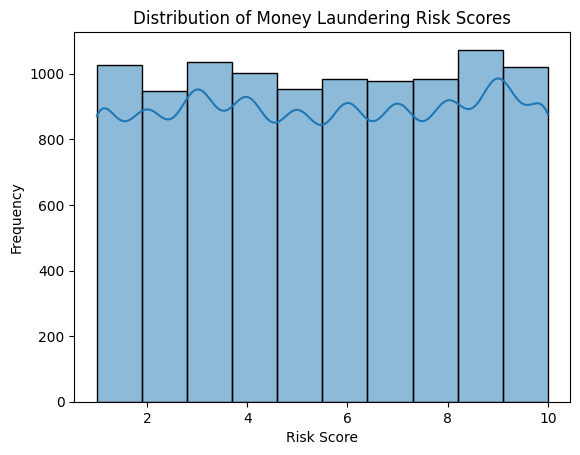

In [16]:
sns.histplot(df['Money Laundering Risk Score'], bins=10, kde=True)
plt.title('Distribution of Money Laundering Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()


## Transactions with Shell Companies

In [17]:
transactions_shell_companies = df[df['Shell Companies Involved'] > 0]


## Transactions by Source of Money

In [18]:
transactions_by_source = df['Source of Money'].value_counts()


## Histogram of Transaction Values

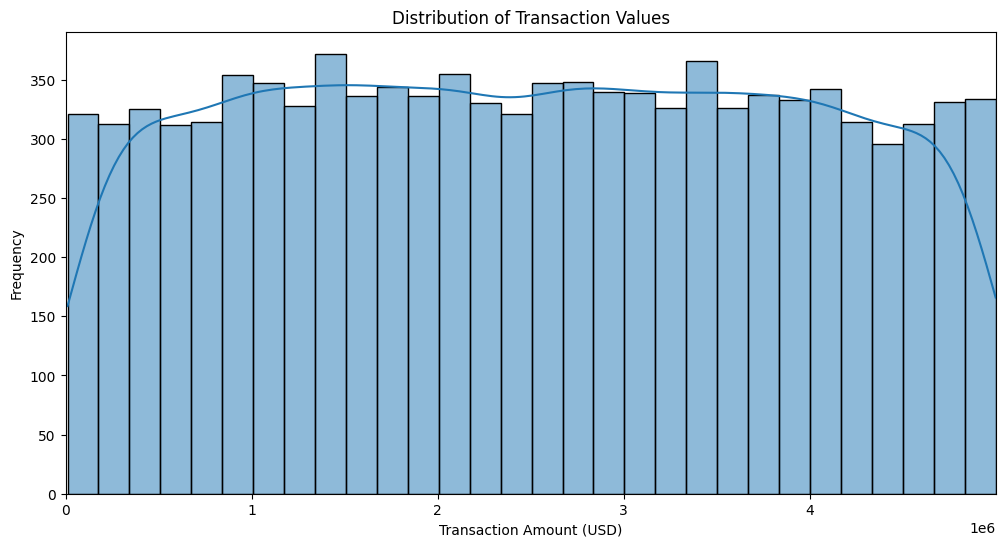

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount (USD)'], bins=30, kde=True)
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Amount (USD)')
plt.ylabel('Frequency')
plt.xlim(0, df['Amount (USD)'].max())  # Adjust x-axis limits for better visibility
plt.show()

## Box Plot of Transaction Values

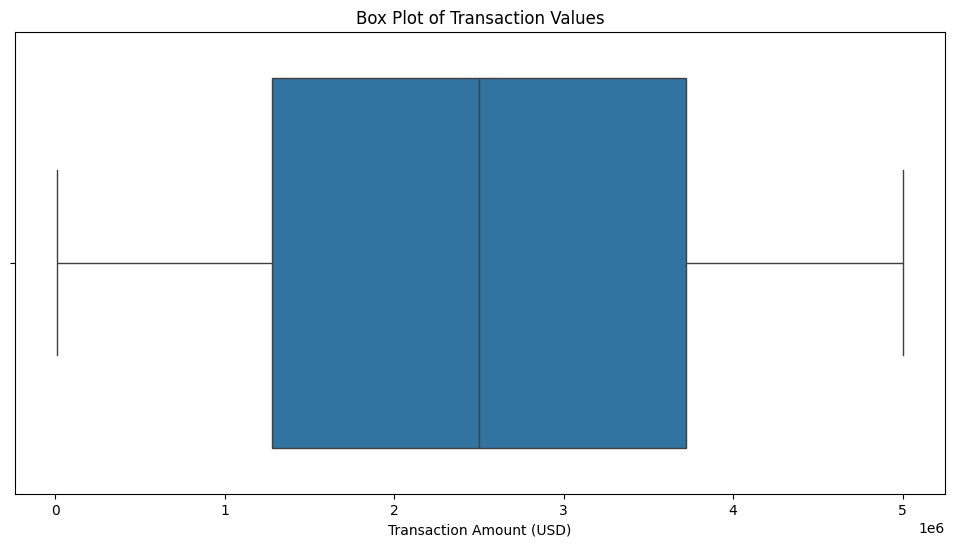

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Amount (USD)'])
plt.title('Box Plot of Transaction Values')
plt.xlabel('Transaction Amount (USD)')
plt.show()


## Identify Outliers
We'll calculate the IQR and filter the DataFrame to exclude outliers.

## Create Visualizations
We'll generate:

A histogram to show the distribution of transaction values.
A box plot to visualize the spread of values.

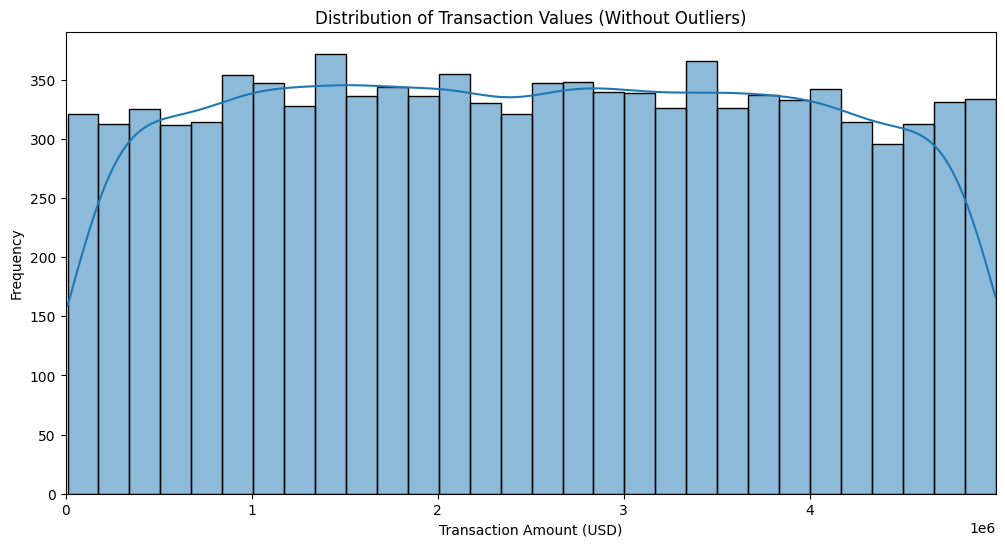

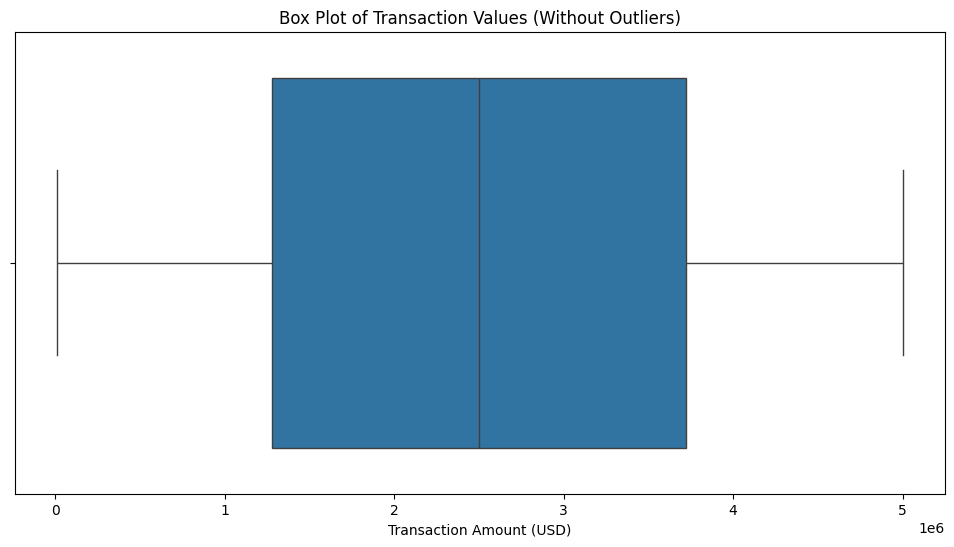

In [24]:
# Step 1: Identify outliers
Q1 = df['Amount (USD)'].quantile(0.25)
Q3 = df['Amount (USD)'].quantile(0.75)
IQR = Q3 - Q1

# Define the limits for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = df[(df['Amount (USD)'] >= lower_bound) & (df['Amount (USD)'] <= upper_bound)]

# Step 2: Create visualizations

# Histogram of Transaction Values (Without Outliers)
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['Amount (USD)'], bins=30, kde=True)
plt.title('Distribution of Transaction Values (Without Outliers)')
plt.xlabel('Transaction Amount (USD)')
plt.ylabel('Frequency')
plt.xlim(0, filtered_df['Amount (USD)'].max())
plt.show()

# Box Plot of Transaction Values (Without Outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered_df['Amount (USD)'])
plt.title('Box Plot of Transaction Values (Without Outliers)')
plt.xlabel('Transaction Amount (USD)')
plt.show()


## Box Plot of Risk Scores by Sector

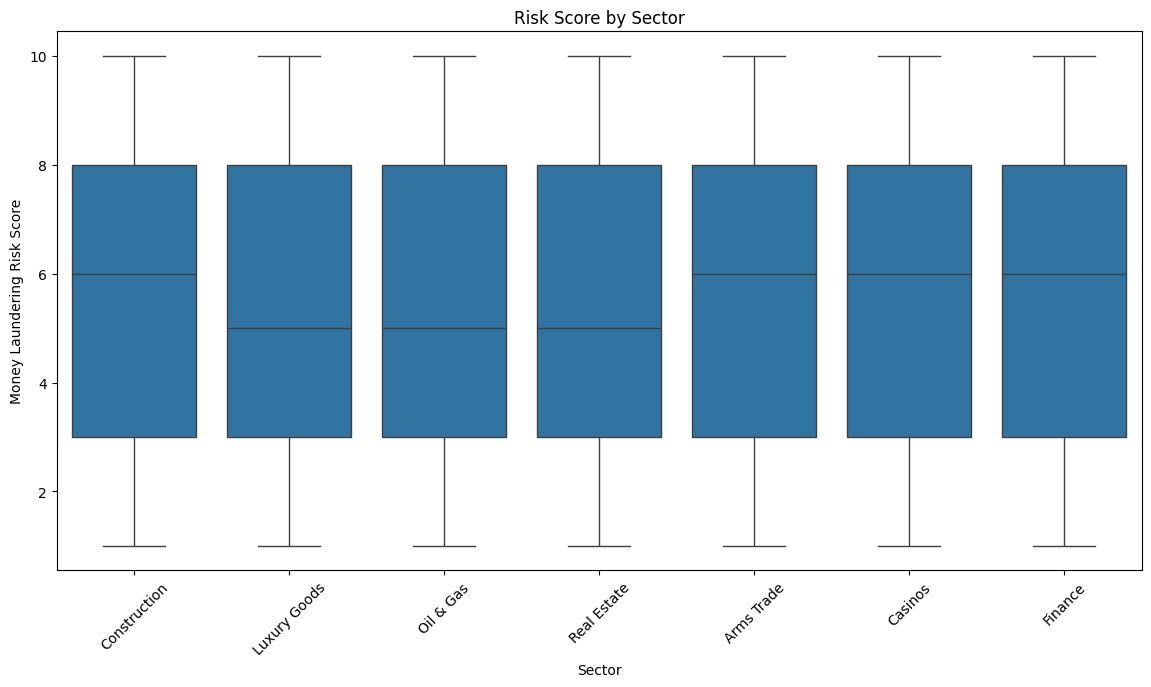

In [25]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Industry', y='Money Laundering Risk Score', data=df)
plt.title('Risk Score by Sector')
plt.xlabel('Sector')
plt.ylabel('Money Laundering Risk Score')
plt.xticks(rotation=45)
plt.show()


## Violin Plot of Risk Scores by Sector

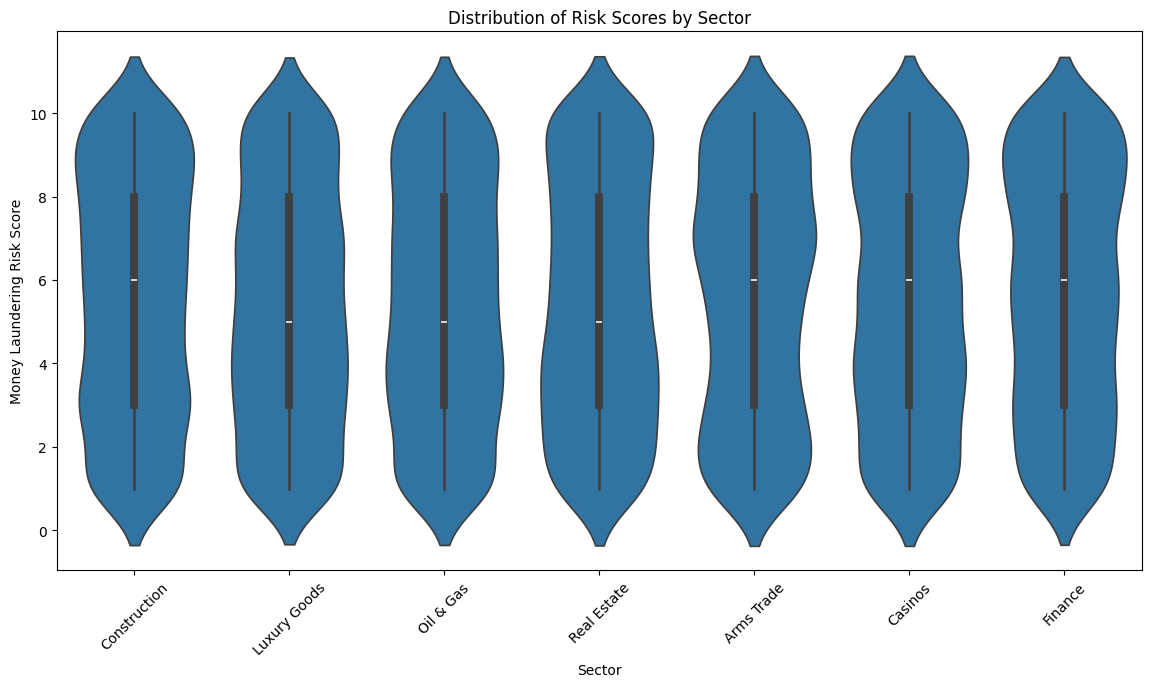

In [26]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='Industry', y='Money Laundering Risk Score', data=df)
plt.title('Distribution of Risk Scores by Sector')
plt.xlabel('Sector')
plt.ylabel('Money Laundering Risk Score')
plt.xticks(rotation=45)
plt.show()


## Summary Statistics

In [27]:
risk_summary = df.groupby('Industry')['Money Laundering Risk Score'].mean().sort_values(ascending=False)

risk_summary


Industry
Finance         5.711864
Construction    5.583562
Arms Trade      5.570721
Casinos         5.556282
Real Estate     5.455301
Oil & Gas       5.427843
Luxury Goods    5.373544
Name: Money Laundering Risk Score, dtype: float64


## Count Transactions by Country

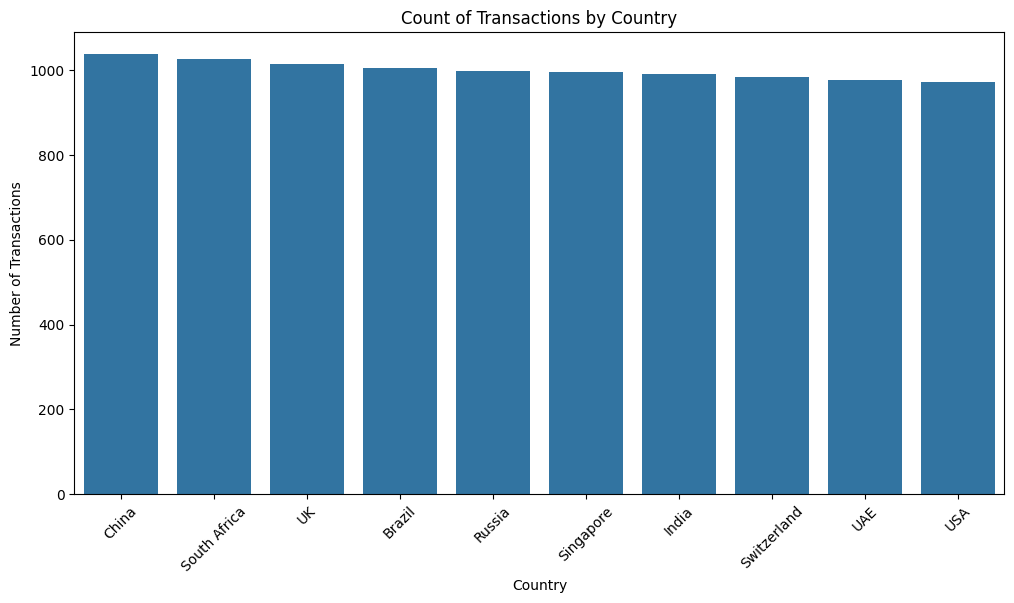

In [31]:
transaction_counts = df['Country'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values)
plt.title('Count of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


##  Count Transactions by Transaction Type

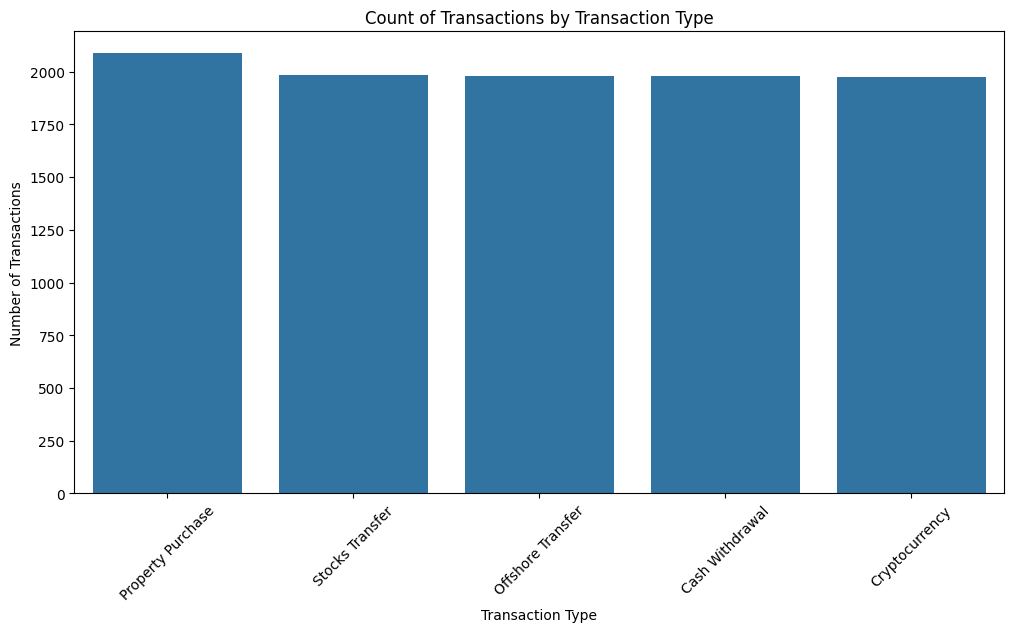

In [32]:
transaction_type_counts = df['Transaction Type'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=transaction_type_counts.index, y=transaction_type_counts.values)
plt.title('Count of Transactions by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


## Count Reported Transactions by Authority

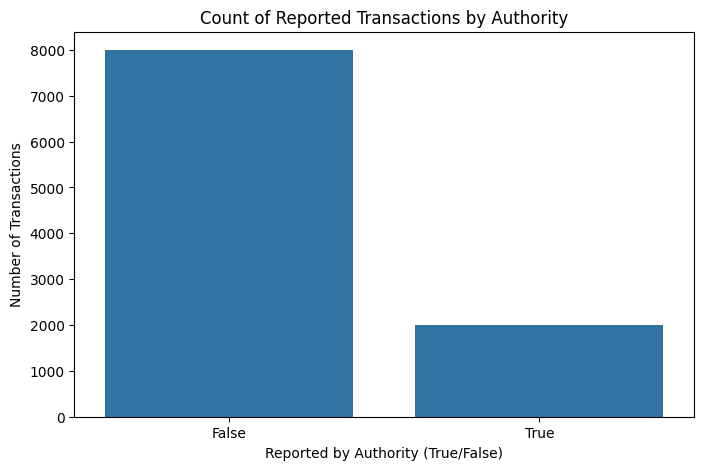

In [33]:
reported_counts = df['Reported by Authority'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=reported_counts.index.astype(str), y=reported_counts.values)
plt.title('Count of Reported Transactions by Authority')
plt.xlabel('Reported by Authority (True/False)')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()


## Correlation Matrix (Heatmap)

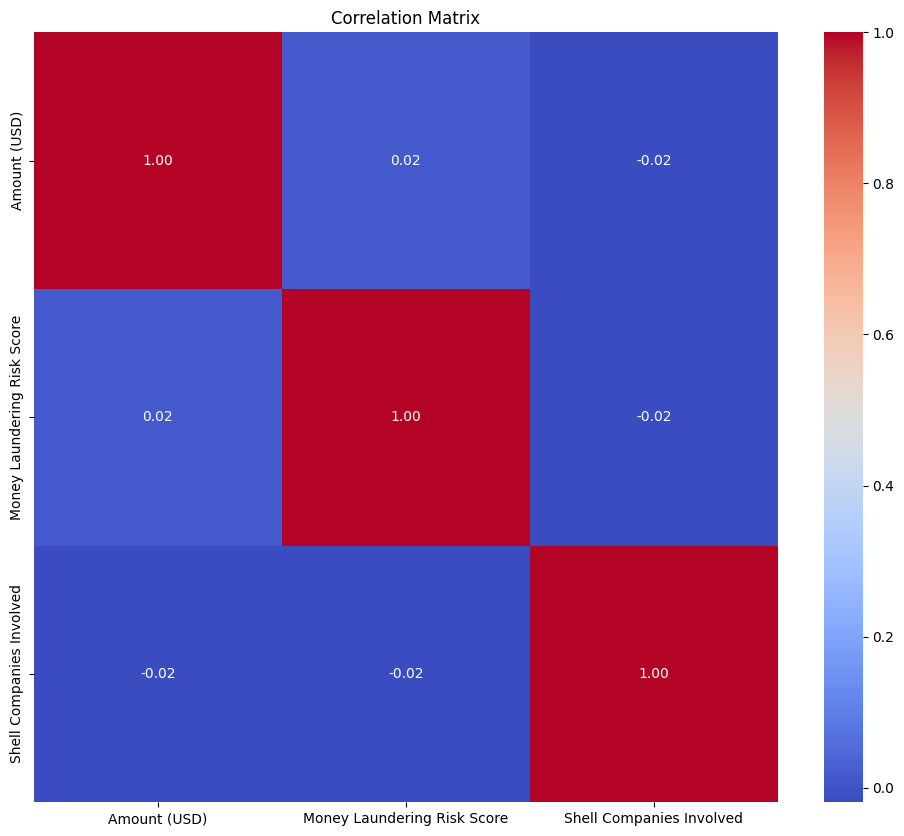

In [35]:
# Correlation matrix of numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = df[['Amount (USD)', 'Money Laundering Risk Score', 'Shell Companies Involved']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Insights from the Global Black Money Transactions Dataset Analysis

1. **Transaction Patterns by Country**:
   - The analysis revealed significant variations in the volume of transactions across different countries. Some countries consistently show higher transaction counts, indicating potential hubs for black money activities. This could be attributed to factors such as regulatory environments, economic conditions, or the presence of financial institutions that facilitate such transactions.

2. **Transaction Types**:
   - Different transaction types, such as offshore transfers and cash withdrawals, exhibit distinct patterns. Certain types may be more prevalent in specific countries or industries, suggesting that particular transaction methods are preferred for laundering money.

3. **Risk Scores by Sector**:
   - The box and violin plots of money laundering risk scores by industry indicated that some sectors are associated with higher risk scores. Industries such as finance and real estate may have more vulnerabilities, which could be a focus for regulatory scrutiny and anti-money laundering (AML) efforts.

4. **Reported Transactions**:
   - The count of reported transactions showed a stark contrast between reported and unreported cases. A lower number of reported transactions raises concerns about the effectiveness of current reporting mechanisms and the potential for untracked illicit activities.

5. **Outlier Analysis**:
   - The removal of outliers in transaction amounts allowed for a clearer view of the distribution, emphasizing that while a few large transactions exist, the majority are of lower value. This insight is crucial for understanding typical transaction behaviors and for setting thresholds in AML monitoring.

6. **Sector-Specific Vulnerabilities**:
   - The analysis highlights specific sectors and transaction types that may require enhanced scrutiny from regulatory bodies. By focusing on industries with higher average risk scores, authorities can prioritize their resources more effectively to combat money laundering.

### Conclusion
Overall, the analysis of the Global Black Money Transactions Dataset provides valuable insights into the dynamics of illicit financial flows. By understanding these patterns, regulators, financial institutions, and policymakers can develop more effective strategies to combat money laundering and enhance financial integrity.